# pyplot, seaborn 혼용
순서
1.  plt.figure(figsize=10,7))
    sns.set(font_scale=1.5)
    sns.set_style("white")
 
2. plot: 독립변수x에 대한 y의 변화를 line으로    
 - x축이 연속적인 series형태인 경우 y축(컬럼)을 선으로 그림  
 - 입력값은 series 또는 df, 인덱스가 x축  (x축이 없는 경우 자동으로 실수값 할당됨)  
  df.plot() 과 plt.plot(df)는 같은 결과나옴   
  
  [색상과 스타일 ]
  plt.plot(x,y,'ro')  
   색상: b (blue), g(green), r, c, m, y, k(black) , w   
   마커: o (circle), v (역삼각형), ^( 삼각형), s(네모), + , . 
2. bar : 독립변수x에 대한 y의 변화를 bar로   
 - x축에 대한 y축의 값을 표현할때 (x축은 index, y축은 컬럼) 
 - 입력값은 series 또는 df, 인덱스가 x축     
3. hist  
 - 시리즈값에 대해 지정한 구간갯수(bin)만큼의 분포도 
4. scatter: 독립변수 2개의 상관관계  
   
   plt.xlabel('x'축") - x축 제목, y도
   plt.title('제목') - 그래프제목
   plt.set_xticklabels(lablename,rotation=90) - x축 값들, y도
   [legend]
    Location String	Location Code
    ‘best’	0
    ‘upper right’	1
    ‘upper left’	2
    ‘lower left’	3
    ‘lower right’	4
    ‘right’	5
    ‘center left’	6
    ‘center right’	7
    ‘lower center’	8
    ‘upper center’	9
    ‘center’	10

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline 
#한글 폰트에서 - 깨지는 문제해결
mpl.rcParams['axes.unicode_minus']=False
fl='E:/글로벌백업(180329)/04.수수료작업/집계.xlsx'
df_m3= pd.read_excel(fl,header=0)

In [ ]:
#df_m3[['지점','합계']].plot()
c

In [ ]:
#2개의 column에 대해
#1. plot
#df_m4.plot()
plt.plot(df_m4)
#2. bar
#df_m4.plot(kind='bar')
df_m4.plot(kind='bar',stacked=True) #인덱스별 1개 막대에 구성비

In [ ]:
#series에 대한것은 plot
#1. plot
#df_m3.groupby('지점')['합계'].agg('sum').plot()
#2. bar
df_m3.groupby('지점')['합계'].agg('sum').plot(kind='bar')
#df_m3.groupby('지점')['합계'].agg('sum').plot.bar()

In [ ]:
df_m4['합계'].hist(bins=50)

In [ ]:
plt.scatter(df_m3.장기, df_m3.합계)

In [ ]:
df_m4.plot.line()

#### [화면에 여러개 그래프- figure / subplot  
 fig = plt.figure()  : figure안에 2개의 subplot위치  
 ax1 = fig.add_subplot(2, 1, 1) :  sub plot1    
 ax2 = fig.add_subplot(2, 1, 2) :  sub plot2    

 ax1.plot(x, sin_y, 'b--')
 ax2.plot(x, cos_y, 'r--')
 plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 2 * np.pi, 0.1)
sin_y = np.sin(x)
cos_y = np.cos(x)

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)  #그래프 그릴 위치 (2행1열, 1번째 sub)  
ax2 = fig.add_subplot(2, 1, 2)                   (2행1열, 2번째 sub)  

ax1.plot(x, sin_y, 'b--') #각각 그래프 생성
ax2.plot(x, cos_y, 'r--')

ax1.set_xlabel('x name')  #x축 라벨
ax1.set_ylabel('y name)')
plt.show()

#### 실제 사례 시작
 - 파일read, 전처리

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

fl='E:/python/testData/건별업적.xlsx'
df= pd.read_excel(fl,header=0)

In [ ]:
df.head(2)

In [2]:
import datetime
cond1= df.파일타입=='A'
fr=pd.to_datetime('2020-02-01',format='%Y-%m-%d')
to=pd.to_datetime('2020-02-28',format='%Y-%m-%d')
cond2= (df.계약일자 >= fr) & (df.계약일자 <= to)
df2=pd.DataFrame(df[cond1 & cond2].groupby(['그룹화지점','계약일자'])['초회보험료'].agg('sum'))
df2=df2.reset_index()

### 한 화면에 그래프 그리기

In [ ]:
df3=df2[df2.그룹화지점=='엠피성공'][['계약일자','초회보험료']]
df3.set_index('계약일자',inplace=True)
plt.plot(df3,label='엠피성공')

df3=df2[df2.그룹화지점=='엠피송내'][['계약일자','초회보험료']]
df3.set_index('계약일자',inplace=True)
plt.plot(df3,label='엠피송내')

df3=df2[df2.그룹화지점=='엠피의정부'][['계약일자','초회보험료']]
df3.set_index('계약일자',inplace=True)
plt.plot(df3,label='엠피의정부')

plt.legend(loc=0)
plt.show()

### 한 화면에 그래프 그리기 -loop

In [ ]:
grps=df2.그룹화지점.unique()
for grp in grps:
    df3=df2[df2.그룹화지점==grp][['계약일자','초회보험료']]
    df3.set_index('계약일자',inplace=True)
    plt.plot(df3,label=grp)
plt.legend(loc=0)
plt.show()

### 한 화면에 그래프 2개 그리기

In [ ]:
df4=pd.DataFrame(df[cond1 & cond2].groupby(['그룹화지점','계약일자'])['초회보험료'].agg('sum'))

In [13]:
fl='D:/글로벌/실적분석/코드파일.xlsx'
#fl='E:/글로벌백업(180329)/04.수수료작업/코드목록.xlsx'
df_grp= pd.read_excel(fl,sheet_name='지점그룹')

df_grp.set_index('지점',inplace=True)
df4.reset_index(inplace=True)
df4=pd.merge(df4,df_grp,how='inner',left_on='그룹화지점', right_on='지점')
df4=df4.rename(columns={'지점그룹_y':'그룹'})

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


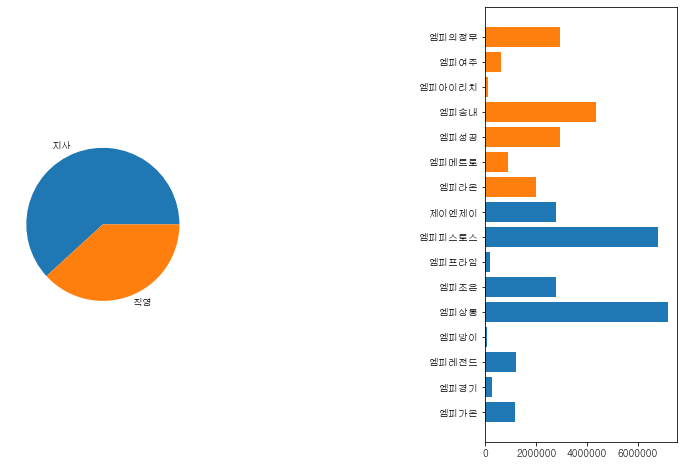

In [14]:
fig = plt.figure()  
ax1 = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2) 

plt.subplots_adjust(wspace=1.5) 
#ax3 = fig.add_subplot(2, 2, 4) 
fig.figsize=(20,10)  #width,height incches

df5=pd.DataFrame(df4.groupby('그룹')['초회보험료'].agg('sum'))
lbls=df5.index
ax1.pie(df5,labels=lbls)
#ax1.legend(loc=1)


df5=pd.DataFrame(df4[df4.그룹=='지사'].groupby('그룹화지점')['초회보험료'].agg('sum'))
df5.reset_index(inplace=True)
ax2.barh(df5.그룹화지점,df5.초회보험료)

df5=pd.DataFrame(df4[df4.그룹=='직영'].groupby('그룹화지점')['초회보험료'].agg('sum'))
df5.reset_index(inplace=True)
ax2.barh(df5.그룹화지점,df5.초회보험료)

plt.show()

In [ ]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')

font_list[:]
